# Internet Access in Indonesian Schools: Impact on Educational Equity

## Descriptive Analysis & Distribution

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("IndonesianSchool_InternetAccess_Data.csv", encoding="latin1", sep=";")  # Ensure correct encoding

# Preview
print(df.head())
print(df.info())

     Education Level        Province   Island  \
0  Elementary School            Aceh  Sumatra   
1  Elementary School  Sumatera Utara  Sumatra   
2  Elementary School  Sumatera Barat  Sumatra   
3  Elementary School            Riau  Sumatra   
4  Elementary School           Jambi  Sumatra   

   State-owned School with Internet  Private-owned School with Internet  \
0                              2188                                 156   
1                              5257                                1321   
2                              2599                                 272   
3                              2426                                 498   
4                              1742                                 136   

   Total Schools with Internet  Total State-owned Schools  \
0                         2344                       3335   
1                         6578                       8167   
2                         2871                       3892   
3         

### Mean, Median and Distribution

Average Schools with Internet: 928 Schools

Median Schools with Internet: 228 Schools

The median points out that half of the provinces have 228 or fewer schools with internet access, despite the average being much higher. 
Since the average is much higher than the median, it means that few provinces have a very large number of schools with internet, which pulls the average up. In contrast, most provinces have a much lower number, closer to the median.

In [5]:
# Mean and median of schools with internet
mean_internet = df['Total Schools with Internet'].mean()
median_internet = df['Total Schools with Internet'].median()
distribution = df['Total Schools with Internet'].describe()

print("Average Schools with Internet:", mean_internet)
print(f"\nMedian Schools with Internet:", median_internet)
print(f"\nDistribution Schools with Internet:")
print(distribution)

Average Schools with Internet: 933.2

Median Schools with Internet: 228.5

Distribution Schools with Internet:
count      190.000000
mean       933.200000
std       2333.050323
min          0.000000
25%         67.000000
50%        228.500000
75%        798.250000
max      17398.000000
Name: Total Schools with Internet, dtype: float64


### Total schools with vs. without internet

Average schools without internet: 19.92087292697908 %

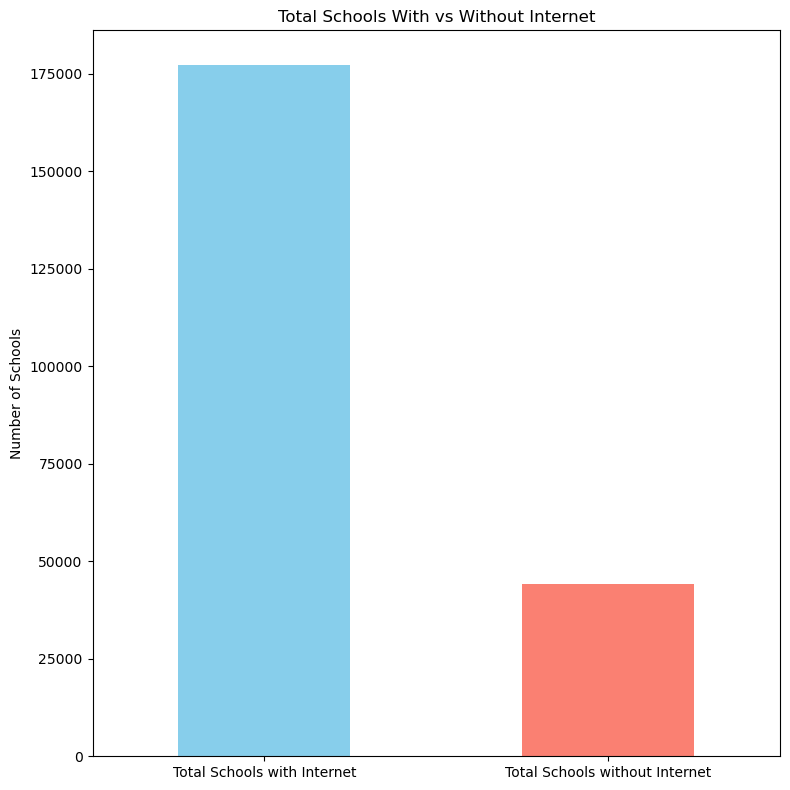

Average schools WITH internet (%): 80.08%
Average schools WITHOUT internet (%): 19.92%


In [6]:
# Calculate total schools with and without internet
df['Total Schools with Internet'] = df['State-owned School with Internet'] + df['Private-owned School with Internet']
df['Total Schools without Internet'] = df['State-owned School without Internet'] + df['Private-owned School without Internet']
df['Total Schools'] = df['Total Schools with Internet'] + df['Total Schools without Internet']

# Plot: Total schools with vs. without internet
plt.figure(figsize=(8, 8))
df[['Total Schools with Internet', 'Total Schools without Internet']].sum().plot(
    kind='bar', color=['skyblue', 'salmon'])
plt.title("Total Schools With vs Without Internet")
plt.ylabel("Number of Schools")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate average percentages
avg_with_internet = (
    df['Total Schools with Internet'].sum() / df['Total Schools'].sum()
) * 100

avg_without_internet = (
    df['Total Schools without Internet'].sum() / df['Total Schools'].sum()
) * 100

# Print results
print("Average schools WITH internet (%): {:.2f}%".format(avg_with_internet))
print("Average schools WITHOUT internet (%): {:.2f}%".format(avg_without_internet))


### Provinces with the lowest number of schools with internet


            Province  Total Schools with Internet
26  Papua Pegunungan                          205
28      Papua Tengah                          344
27     Papua Selatan                          351
24       Papua Barat                          444
15  Kalimantan Utara                          485


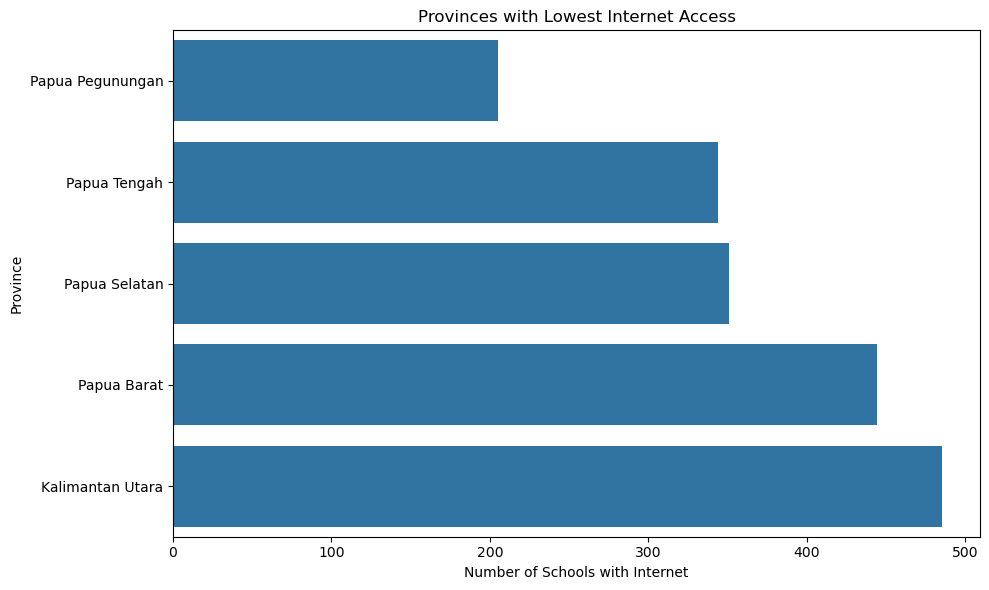

In [7]:
# Group by Province and sum the internet counts
province_internet = df.groupby('Province')['Total Schools with Internet'].sum().reset_index()

# Get the bottom 5 provinces with the lowest internet access
lowest_provinces = province_internet.sort_values(by='Total Schools with Internet').head(5)

print(lowest_provinces)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=lowest_provinces,
            x='Total Schools with Internet',
            y='Province')

plt.title("Provinces with Lowest Internet Access")
plt.xlabel("Number of Schools with Internet")
plt.ylabel("Province")
plt.tight_layout()
plt.show()

### Total number of Internet access by school "ownership type"

Private-owned schools have less internet access than state-owned schools

               Internet Access
Private-owned            49289
State-owned             128019


<Figure size 800x600 with 0 Axes>

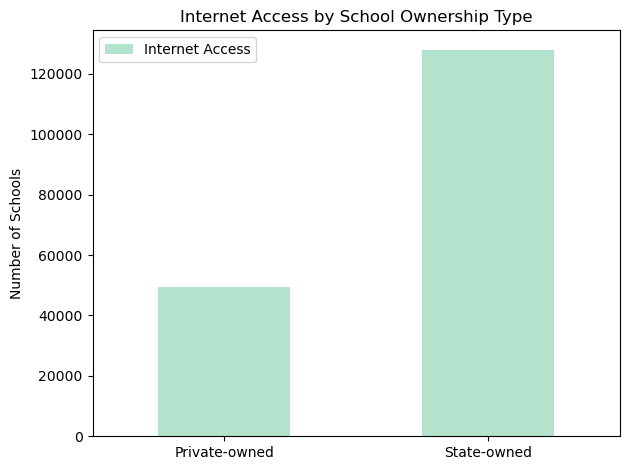

In [8]:
ownership_types = {
    'State-owned': df['State-owned School with Internet'].sum(),
    'Private-owned': df['Private-owned School with Internet'].sum()
}

ownership_df = pd.DataFrame.from_dict(ownership_types, orient='index', columns=['Internet Access']).sort_values('Internet Access')
print(ownership_df)

plt.figure(figsize=(8, 6))
ownership_df.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title("Internet Access by School Ownership Type")
plt.ylabel("Number of Schools")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

               With Internet  Without Internet
State-owned           128019             36821
Private-owned          49289              7287


<Figure size 800x600 with 0 Axes>

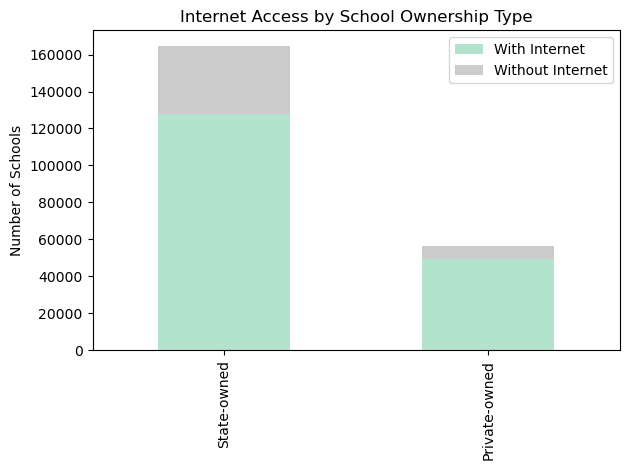

In [9]:
# Plot 2: Internet access by school ownership type
ownership_data = {
    'With Internet': [
        df['State-owned School with Internet'].sum(),
        df['Private-owned School with Internet'].sum()
    ],
    'Without Internet': [
        df['State-owned School without Internet'].sum(),
        df['Private-owned School without Internet'].sum()
    ]
}
ownership_df = pd.DataFrame(ownership_data, index=['State-owned', 'Private-owned'])
print(ownership_df)

plt.figure(figsize=(8, 6))
ownership_df.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title("Internet Access by School Ownership Type")
plt.ylabel("Number of Schools")

plt.tight_layout()
plt.show()

### Average internet access by "Ownership type"

Average State-owned Internet Access (%): 77.66258189759768

Average Private-owned Internet Access (%): 89.76161424851122

These Results show that the most private-owned schools have internet access in comparison to State-owned schools, altough the number of Private-owned schools is generally much lower than the State-owned schools.

In [10]:
# Calculate internet access rate columns
avg_state_with_internet = (df['State-owned School with Internet'].sum() / df['Total State-owned Schools'].sum()) * 100
avg_private_with_internet = (df['Private-owned School with Internet'].sum() / df['Total Private-owned Schools'].sum()) * 100
print("Average State-owned Internet Access (%):", avg_state_with_internet)
print("Average Private-owned Internet Access (%):", avg_private_with_internet)

Average State-owned Internet Access (%): 77.66258189759768
Average Private-owned Internet Access (%): 89.76161424851122


### Total number of Internet access by schools "education levels"

Special needs schools have the poorest internet access

Education Level
Elementary School         115260
Middle School              35093
Vocational High School     13015
High School                11848
Special Needs School        2092
Name: Total Schools with Internet, dtype: int64


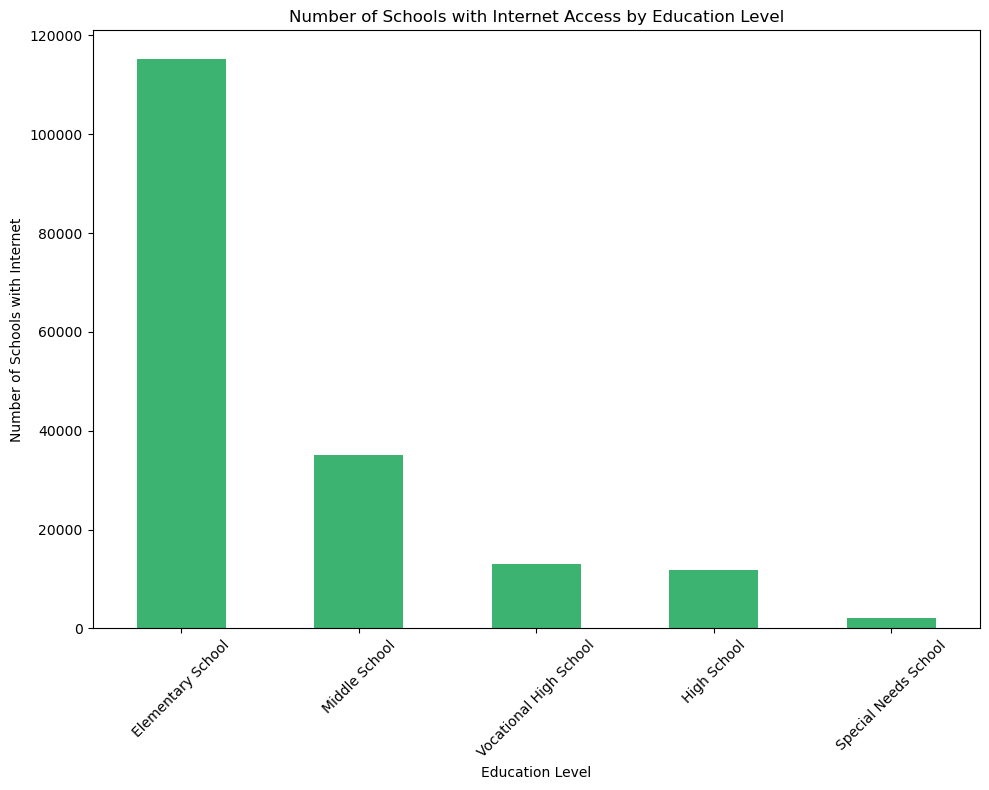

In [11]:
# Plot 1: Internet access by education levels

plt.figure(figsize=(10, 8))
education_level_sum = df.groupby('Education Level')['Total Schools with Internet'].sum().sort_values(ascending=False)

print(education_level_sum)

education_level_sum.head(5).plot(kind='bar', color='mediumseagreen')
plt.title("Number of Schools with Internet Access by Education Level")
plt.ylabel("Number of Schools with Internet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Comparative Analysis

### Distribution of schools with internet by island

Java island has the most schools with internet access, this reflects with Java island being the most populated island in Indonesia.

In contrast Maluku and New Guinea have the lowest internet access, because of the lower population rate and less integrated areas. 

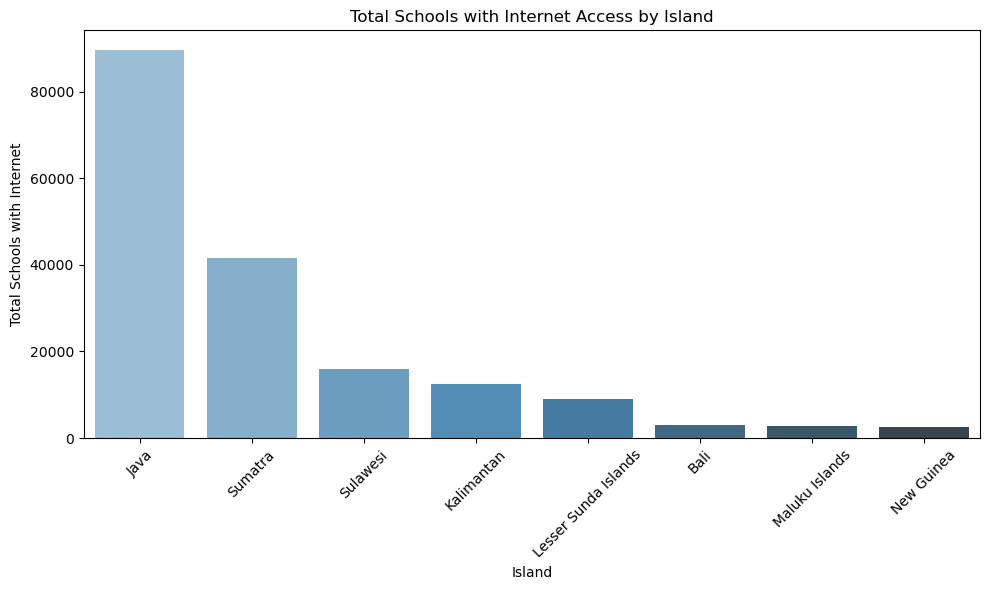

In [12]:
# Barplot - distribution of schools with internet by island

# Group by Island and sum Total Schools with Internet
internet_by_island = df.groupby("Island")["Total Schools with Internet"].sum().reset_index()

# Sort values for better visualization
internet_by_island = internet_by_island.sort_values(by="Total Schools with Internet", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Island", y="Total Schools with Internet", hue="Island", data=internet_by_island, palette="Blues_d")
plt.title("Total Schools with Internet Access by Island")
plt.ylabel("Total Schools with Internet")
plt.xlabel("Island")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 5 provinces by average internet-connected schools

Schools in Jawa Barat Province have the highest internet access

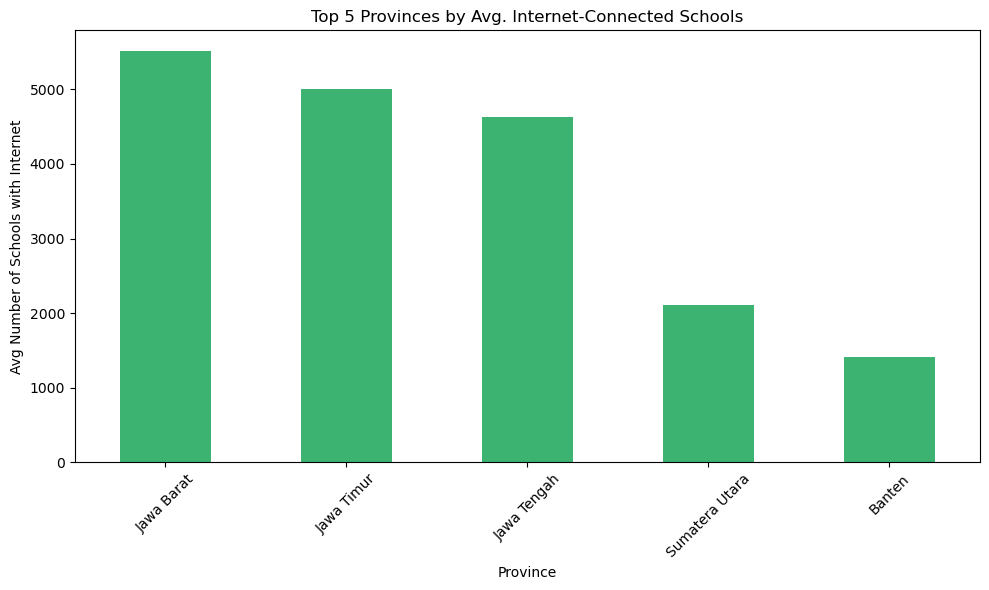

In [13]:
# Plot: Top 5 provinces by average internet-connected schools

province_avg = df.groupby('Province')['Total Schools with Internet'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
province_avg.head(5).plot(kind='bar', color='mediumseagreen')
plt.title("Top 5 Provinces by Avg. Internet-Connected Schools")
plt.ylabel("Avg Number of Schools with Internet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Percentage of schools with internet access (relative to total schools per province)

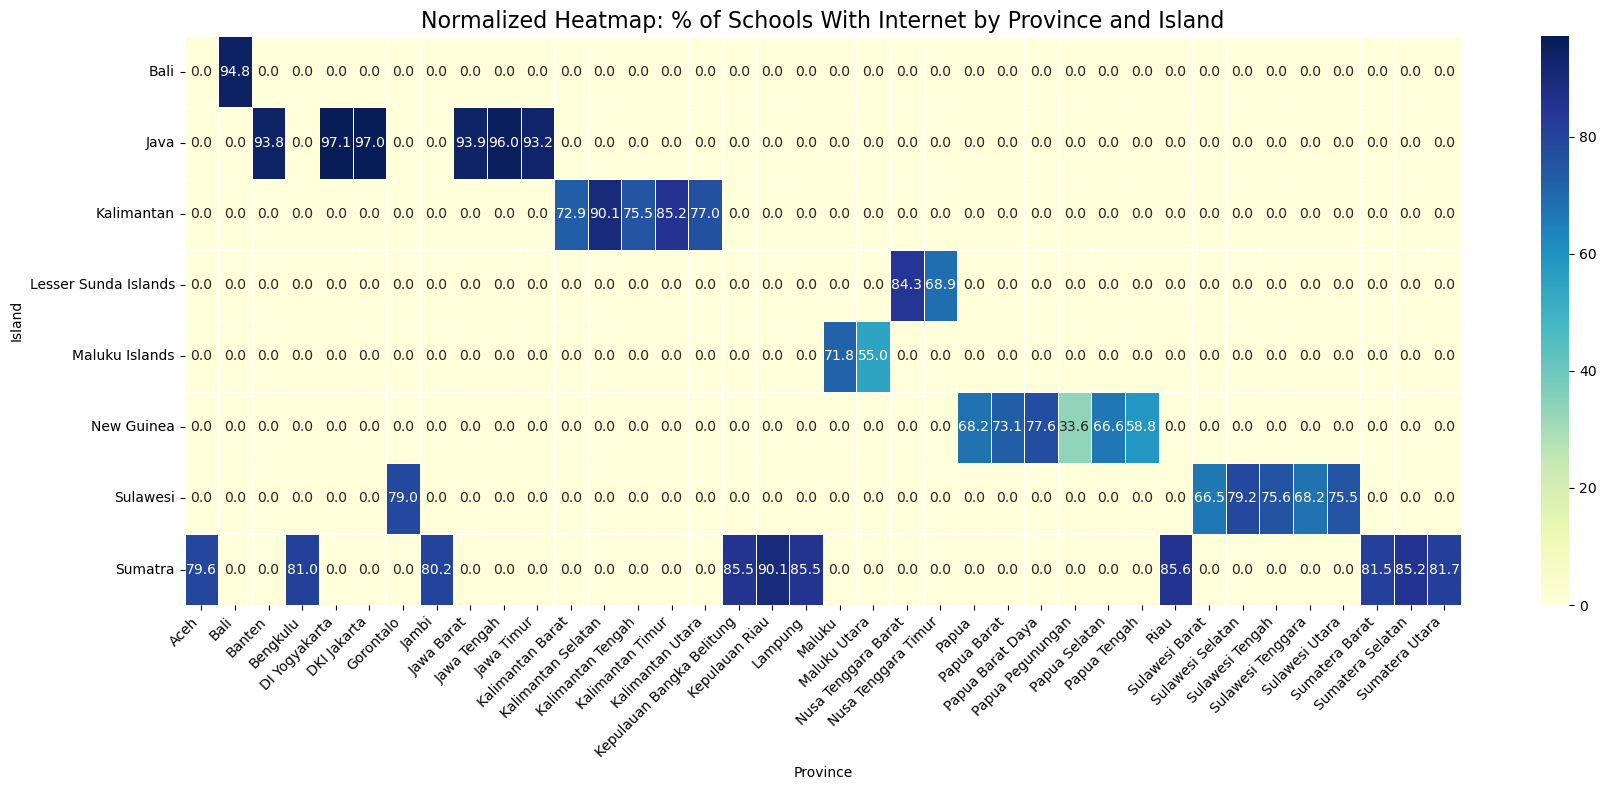

In [15]:
# Calculate percentage of schools with internet
df['Percent schools with internet'] = (
    df['Total Schools with Internet'] / df['Total Schools']
) * 100

# Prepare normalized heatmap data
normalized_data = df.groupby(['Island', 'Province'])['Percent schools with internet'].mean().unstack().fillna(0)

# Plot the normalized heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(normalized_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Normalized Heatmap: % of Schools With Internet by Province and Island", fontsize=16)
plt.xlabel("Province")
plt.ylabel("Island")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Regression Analysis

### Logistic Regression

Logistic regression is used in this case because the core business question involves predicting a binary outcome: whether a school has internet access or not. It provides clear coefficients showing how each feature (like province, education level, island) affects the odds of having internet access. It works well with categorical data.

From the confusion matrix: 
- 2 schools were correctly predicted as not having internet access.
- 2 schools were wrongly predicted as having internet access.
- 14 schools *with* internet were incorrectly predicted as *without internet*.
- 39 schools were correctly classified as having internet access

Precision (positive predict value):
- For class 0 (schools without internet): When the model predicts schools without internet access, it's right only 12% of the time. — lots of false positives.​
- For class 1 (schools with internet): 95% predictions of schools were correct — low false positives.​

Recall (sesitivity):
- For class 0 (schools without internet): It caught 50% of actual no-internet schools.
- For class 1 (schools with internet): It caught 74% of internet-access schools.

F1-Score (Harmonic mean of precision and recall): It is useful for balance between precision and recall.
- For class 0 (schools without internet): 0.20 is very low, meaning the model is unreliable at identifying underserved schools. It either rarely predicts class 0 or gets it wrong when it does.​
- For class 1 (schools with internet): 0.83 shows the model is strong for schools with internet access.

Best metric choice is Recall for class 0 to identify schools lacking internet so improvement actions can be targeted.​ Precision is less critical, mistakenly flagging an internet-connected school (false positives) are less harmful than missing an unconnected one (false negatives).

Overall accuracy (72%) is not bad but it's driven mostly by the dominant class, so it is misleading due to class imbalance.
The model is good at finding schools with internet but still struggles with identifying schools without it — the more critical case.

Model works well for predicting when internet access is available (class 1).
Model performs poorly for detecting lack of access (class 0).
Applying class_weight='balanced' still limits performance, due to the small number of class 0 examples.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("IndonesianSchool_InternetAccess_Data.csv", encoding="latin1", sep=";")  # Ensure correct encoding

# Drop rows with missing values
df = df.dropna(subset=[
    'Total Schools',
    'Total Schools with Internet',
    'Total Schools without Internet',
    'Total State-owned Schools',
    'Total Private-owned Schools',
    'State-owned School with Internet',
    'Private-owned School with Internet',
    'State-owned School without Internet',
    'Private-owned School without Internet',
    'Education Level',
    'Province',
    'Island'
])

# Create binary target: 1 if majority of schools in row have internet, 0 otherwise
df['Total Schools with Internet'] = pd.to_numeric(df['Total Schools with Internet'], errors='coerce')
df['Total Schools'] = pd.to_numeric(df['Total Schools'], errors='coerce')

df['Internet_Access'] = (df['Total Schools with Internet'] / df['Total Schools'] >= 0.5).astype(int)


# Encode categorical variables
label_enc = LabelEncoder()
df['Island'] = label_enc.fit_transform(df['Island'])
df['Province'] = label_enc.fit_transform(df['Province'])
df['Education Level'] = label_enc.fit_transform(df['Education Level'])

# Define features and target
X = df[['Island', 'Province', 'Education Level']]
y = df['Internet_Access']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
 [[ 2  2]
 [14 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.50      0.20         4
           1       0.95      0.74      0.83        53

    accuracy                           0.72        57
   macro avg       0.54      0.62      0.51        57
weighted avg       0.89      0.72      0.79        57

